In this project, we take the twitter dataset and predict which statement is positive , negative 
In this we are building Binary text classifier to classify the sentiment behind the text

Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Data Pre-Processing


In [3]:
#data = pd.read_csv('/content/training.csv')


#tweet_data = pd.read_csv('/content/Tweets.csv')
#data = pd.read_csv("/content/Twitter.csv",encoding='ISO-8859-1')
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
tweet_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.csv',encoding = "ISO-8859-1",names=DATASET_COLUMNS)


In [4]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [5]:
tweet_data.shape

(1048576, 6)

In [6]:
tweet_data.describe()


,target,ids
count,1.048576e+06,1.048576e+06
mean,9.482422e-01,1.976166e+09
std,1.701120e+00,2.300584e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990869e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [7]:
tweet_data.isnull()

,target,ids,date,flag,user,text
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False
1048574,False,False,False,False,False,False


In [8]:
tweet_data.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:

tweet_data.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
tweet_data.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [11]:
def drop_columns(data_frame,columns):
    '''
    Function To drop specific columns in Data Frame
    input:
    data_frame --> Data frame that we want to drop on it
    columns    --> list of columns name we want to drop
    
    return:
    Data Frame After Delete Column
    '''
    
    data_frame = data_frame.drop(columns,axis=1)

    return data_frame

In [12]:
tweet_data.drop(tweet_data.head(551424).index, inplace=True)


In [13]:
tweet_data['target'].value_counts()

0    248576
4    248576
Name: target, dtype: int64

In [14]:
usless_columns = ["ids", "date",'user','flag']
tweet_data = drop_columns( tweet_data, usless_columns)



#this will show the number of categories in the target valu
tweet_data['target'].value_counts()

0    248576
4    248576
Name: target, dtype: int64

In [15]:
tweet_data.columns

Index(['target', 'text'], dtype='object')

In [16]:
#tweet_df = data[tweet_data['airline_sentiment'] != 'neutral']
print(tweet_data.shape)
tweet_data.head(5)
#we took only our desired column

(497152, 2)


,target,text
551424,0,@peanutxz woman! where were you!!!
551425,0,just finished packing....i guess we can say i'...
551426,0,@idntqivafck O SHID i WiLL..WATCH i HOPE
551427,0,@adelcomp Sorry adelcomp been crazy busy. And ...
551428,0,is lovin Picture2Life.com!!! Y all fun apps r ...


In [17]:
sentiment_label = tweet_data.target.factorize()
sentiment_label

# i love my dog 
#   0 1   4   6
# 
#machine only understand numerical value so by factorize function 

# we convert the outcome/target value into numerical value


(array([0, 0, 0, ..., 1, 1, 1]), Int64Index([0, 4], dtype='int64'))

0-> Negative 
4-> Positive


In [18]:
tweet = tweet_data.text.values

In [19]:
#"word embedding"
# tokenize all the words in the text with the help of tokenizer 
# in this we break down the word of a text into small part called tokens
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [20]:
print(tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
print(tweet[0])
print(encoded_docs[0])

@peanutxz woman! where were you!!! 
[1188, 216, 169, 7]


2.Build the Text Classifier 

For Building we used RNN type Neural Network LSTM(Long short term Memory Network )

and dense layer at the end 
and to avoid overfitting we uses drop-out mechanism in b/w 

In [22]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,
                kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
               activation="tanh"))

# model.add(Dropout(0.2))
model.add(Dense(1)) 
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False),optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           9870400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 9,887,051
Trainable params: 9,887,051
Non-trainable params: 0
_________________________________________________________________
None


3. Train the Sentiment Analysis Model

In [23]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
12429/12429 [==============================] - 199s 15ms/step - loss: 0.4864 - accuracy: 0.7854 - val_loss: 0.6792 - val_accuracy: 0.6264
Epoch 2/5
12429/12429 [==============================] - 187s 15ms/step - loss: 0.4241 - accuracy: 0.8150 - val_loss: 0.6630 - val_accuracy: 0.6700
Epoch 3/5
12429/12429 [==============================] - 186s 15ms/step - loss: 0.4102 - accuracy: 0.8218 - val_loss: 0.6465 - val_accuracy: 0.7012
Epoch 4/5
12429/12429 [==============================] - 186s 15ms/step - loss: 0.4025 - accuracy: 0.8252 - val_loss: 0.5995 - val_accuracy: 0.7173
Epoch 5/5
12429/12429 [==============================] - 185s 15ms/step - loss: 0.4020 - accuracy: 0.8275 - val_loss: 0.5935 - val_accuracy: 0.7186


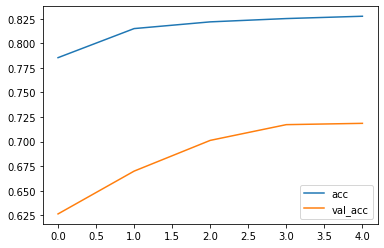

<Figure size 432x288 with 0 Axes>

In [24]:
# plotting the training and test accuracy score 
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")



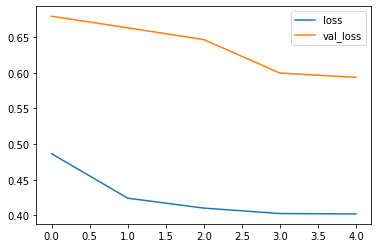

<Figure size 432x288 with 0 Axes>

In [25]:
 # plotting the loss 
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

Building the Predictive System

In [26]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [27]:
test_sentence1 = "I didn't enjoy my last flight"
predict_sentiment(test_sentence1)

test_sentence2 = "This is the best moment of my life "
predict_sentiment(test_sentence2)

Predicted label:  0
Predicted label:  4


In [28]:
import pickle 

filename = 'trained_model.sav'
pickle.dump(Tokenizer, open(filename,'wb'))

loaded_model = pickle.load(open('trained_model.sav', 'rb'))


# saved_model = pickle.dumps(tokenizer)

# trained_model = pickle.loads(saved_model)

In [29]:
tweet = input('Input tweet text : ')
predict_sentiment(tweet)

Input tweet text : i love myself
Predicted label:  4
